In [ ]:
# Desafio Regressão Squad Ameenah - Bootcamp Data Analytics

import pandas as pd

# Carregar os dados
# df = pd.read_csv('/content/desafio_01_preco_imoveis230209164627-230918-093224.csv')
df = pd.read_csv('/content/desafio_01_preco_imoveis.csv')

# Excluir colunas não numéricas
df_numeric = df.drop(columns=["id", "date", "zipcode"])

# Calcular a matriz de correlação
correlation_matrix = df_numeric.corr()

print(df_numeric.head())


**Questão 1:** Análise de correlação entre as variáveis

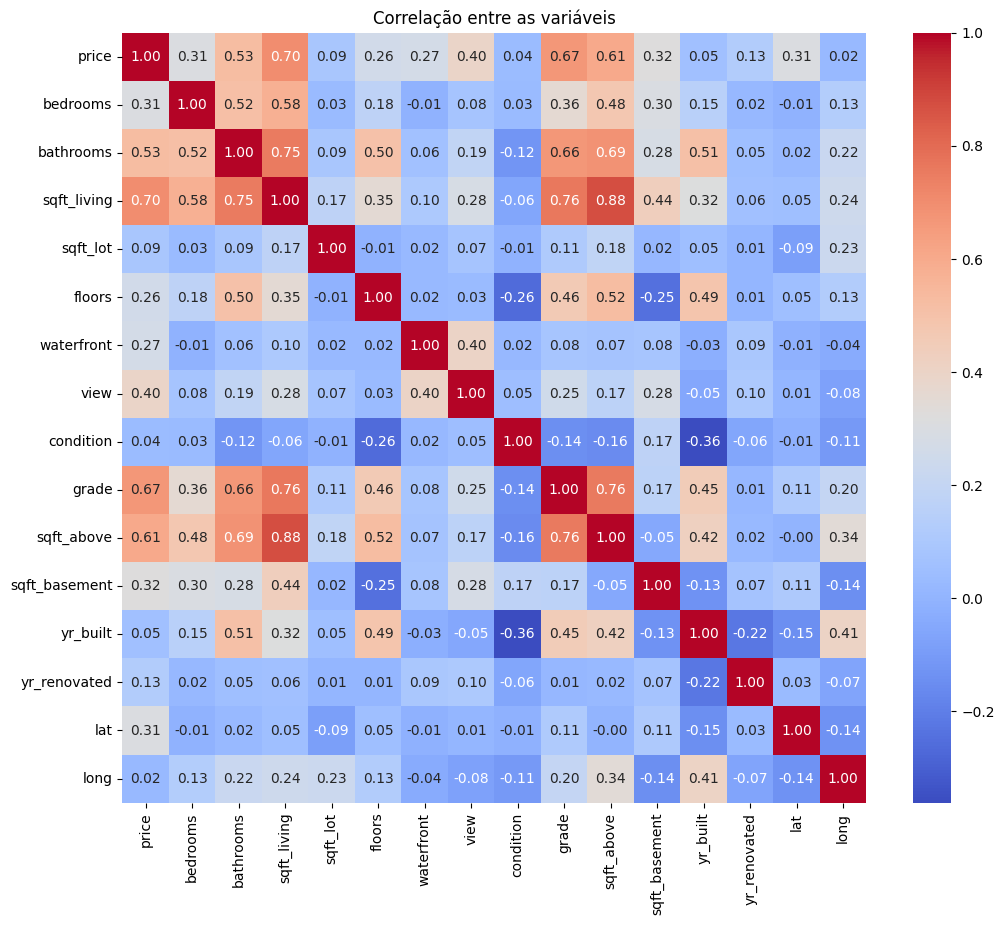

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre as variáveis")
plt.show()


In [5]:
# Identificar as variáveis mais correlacionadas com o preço do imóvel
price_correlation = correlation_matrix["price"].sort_values(ascending=False)
print("Variáveis mais correlacionadas com o preço do imóvel:\n", price_correlation[:6])

# Identificar as variáveis menos correlacionadas com o preço do imóvel
least_correlated = price_correlation.tail(5)
print("\nVariáveis menos correlacionadas com o preço do imóvel:\n", least_correlated)


Variáveis mais correlacionadas com o preço do imóvel:
 price          1.000000
sqft_living    0.702035
grade          0.667434
sqft_above     0.605567
bathrooms      0.525138
view           0.397293
Name: price, dtype: float64

Variáveis menos correlacionadas com o preço do imóvel:
 yr_renovated    0.126434
sqft_lot        0.089661
yr_built        0.054012
condition       0.036362
long            0.021626
Name: price, dtype: float64


**Variáveis mais correlacionadas com o preço do imóvel:**

sqft_living (0.702): A área de estar tem uma correlação positiva significativa com o preço do imóvel, indicando que casas com mais espaço tendem a ter preços mais altos.

grade (0.667): A classificação do imóvel tem uma forte correlação positiva com o preço, sugerindo que imóveis com classificações mais altas geralmente têm preços mais elevados.

sqft_above (0.606): A área acima do solo está positivamente correlacionada com o preço, o que significa que imóveis com mais espaço habitável acima do solo tendem a ter preços mais altos.

bathrooms (0.525): O número de banheiros também está positivamente correlacionado com o preço do imóvel, indicando que imóveis com mais banheiros geralmente têm preços mais altos.

view (0.397): A qualidade da vista está correlacionada positivamente com o preço, sugerindo que imóveis com vistas melhores tendem a ter preços mais elevados.

**Variáveis menos correlacionadas com o preço do imóvel:**

yr_renovated (0.126): O ano de renovação tem uma correlação positiva, mas fraca, com o preço do imóvel.

sqft_lot (0.090): A área do lote tem uma correlação positiva, mas relativamente fraca, com o preço do imóvel.

yr_built (0.054): O ano de construção tem uma correlação positiva, mas fraca, com o preço do imóvel.

condition (0.036): A condição da propriedade tem uma correlação positiva, mas muito fraca, com o preço do imóvel.

long (0.022): A longitude tem uma correlação positiva muito fraca com o preço do imóvel








**Questão 2:** Gráficos de distribuição e dispersão para as top 5 variáveis mais correlacionadas

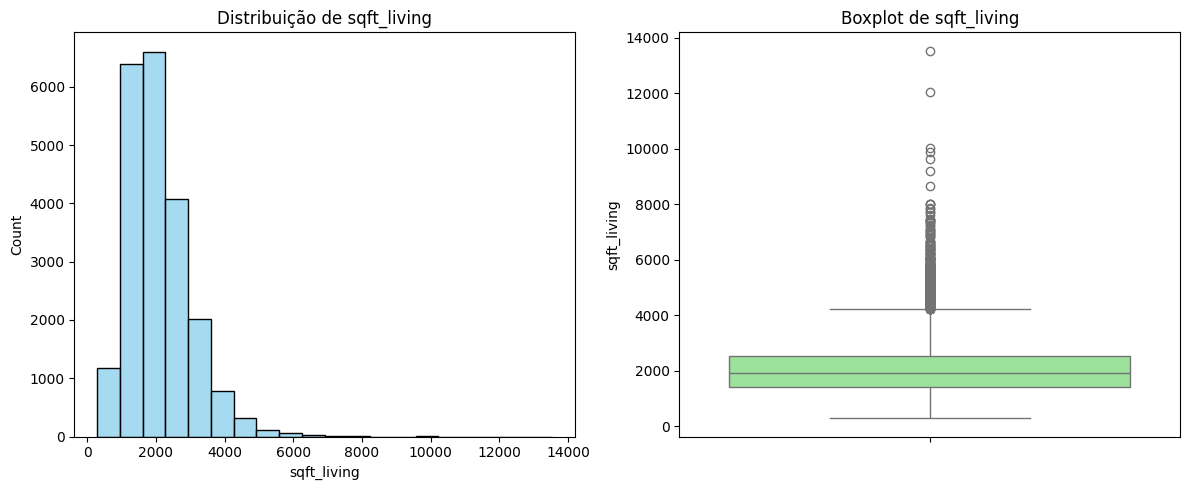

<Figure size 640x480 with 0 Axes>

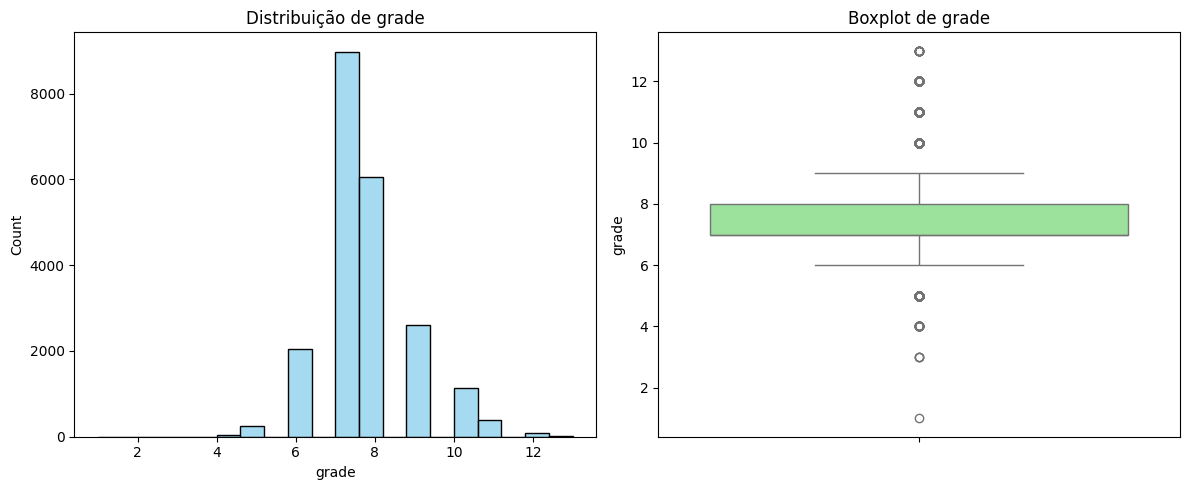

<Figure size 640x480 with 0 Axes>

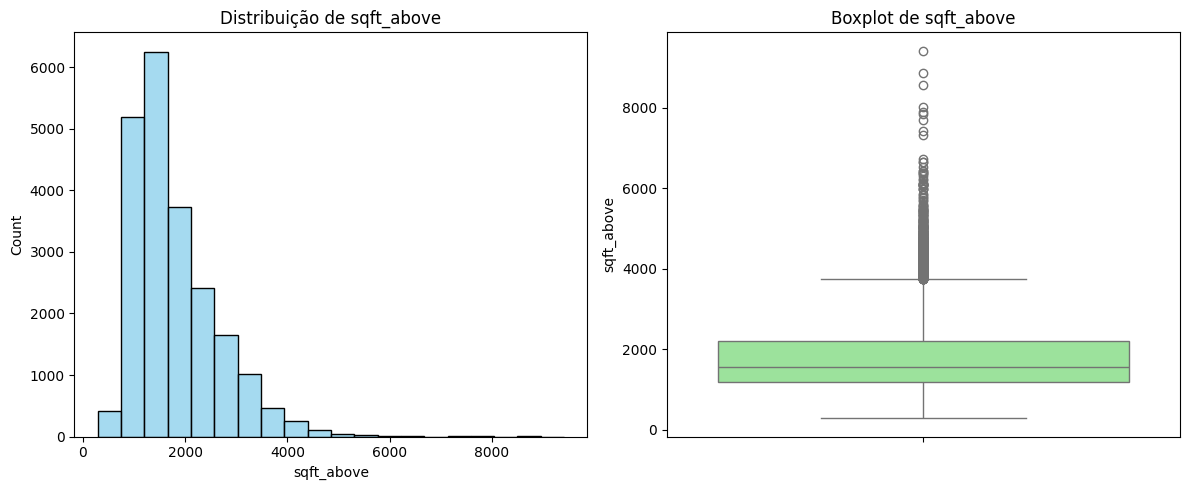

<Figure size 640x480 with 0 Axes>

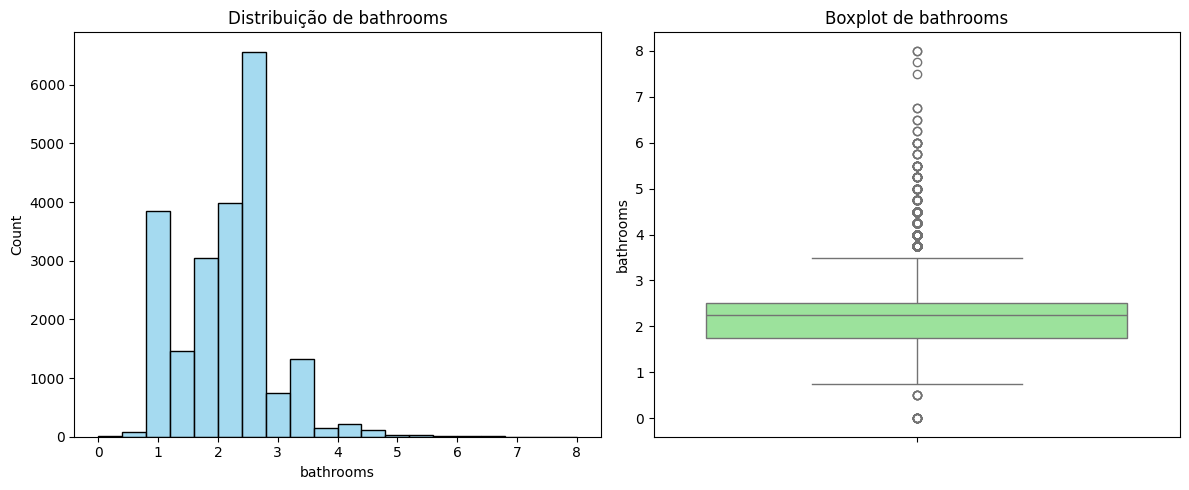

<Figure size 640x480 with 0 Axes>

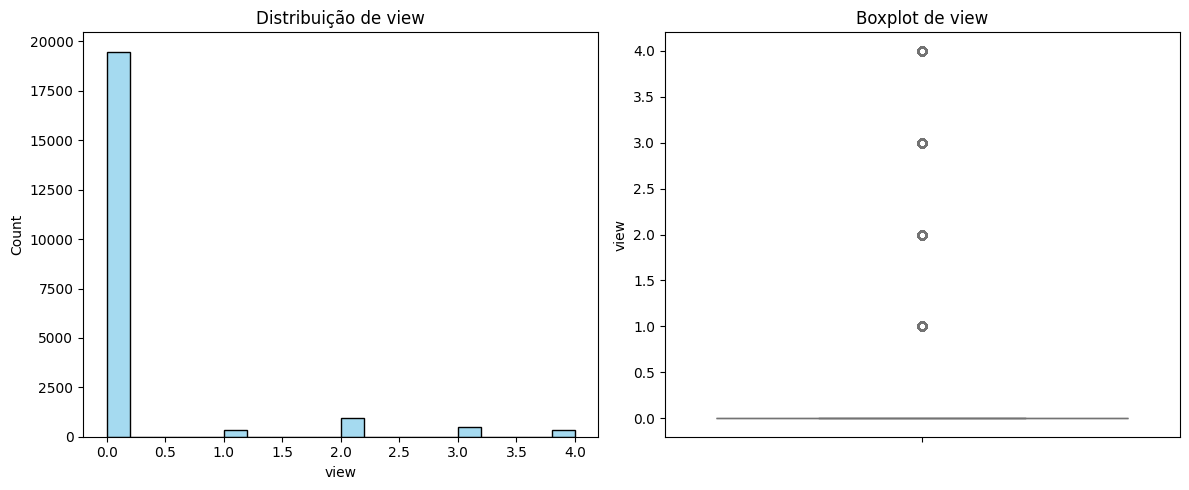

<Figure size 640x480 with 0 Axes>

In [14]:
# Gráficos de distribuição das 5 variáveis mais correlacionadas

top_5_correlated = ['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view']

for variable in top_5_correlated:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df[variable], bins=20, color='skyblue')
    plt.title(f'Distribuição de {variable}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable], color='lightgreen')
    plt.title(f'Boxplot de {variable}')

    plt.tight_layout()
    plt.show()
    plt.clf()


- As variáveis sqft_living e sqft_above possuem distribuições aproximadamente normais com assimetria a esquerda. Para a variável grade, referente às notas, também é possível notar a normalidade dos dados, apesar de se tratar de números inteiros e o gráfico de distribuição apresentar espaçamentos
- Na distribuição de número de banheiros não podemos afirmar a normalidade pois as frequências não apresentam formato de sino. Além disso, as casas com 1 banheiro possuem alta frequência, resultando em média e médiana bastante diferentes.
- A distribuição de quartos com vista (view) também não possui comportamento normal, pois a maioria das casas possui 0 quartos com vista.

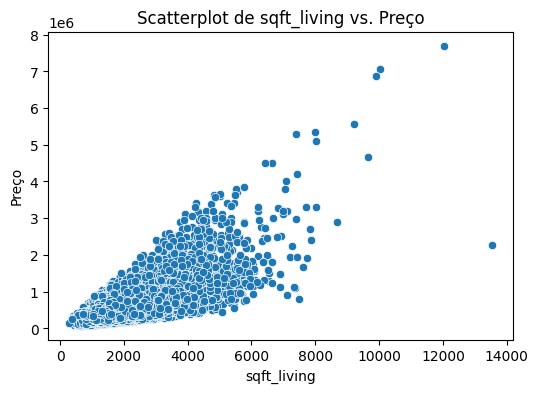

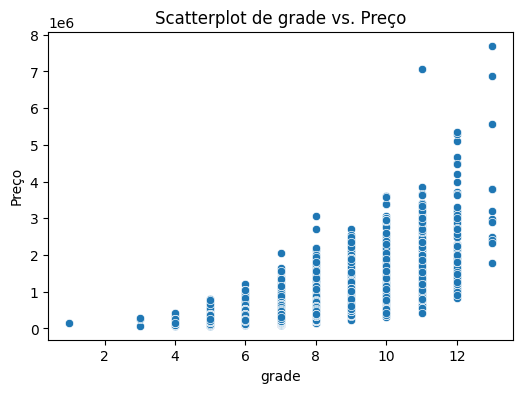

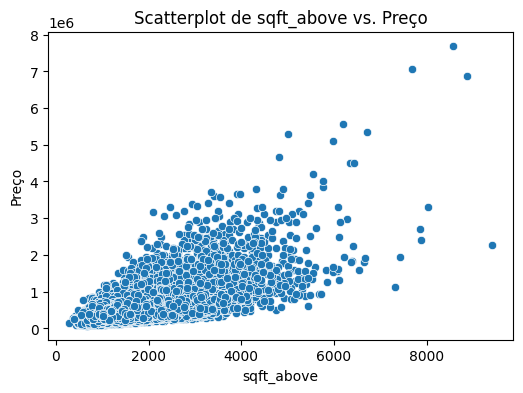

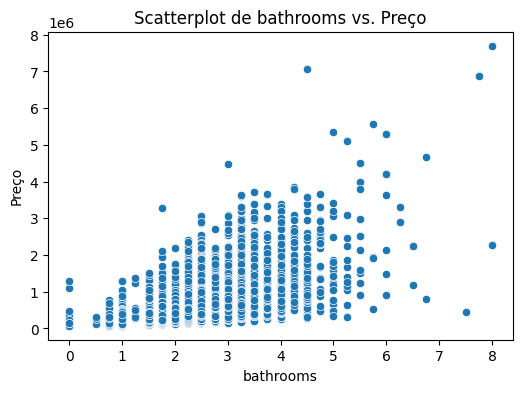

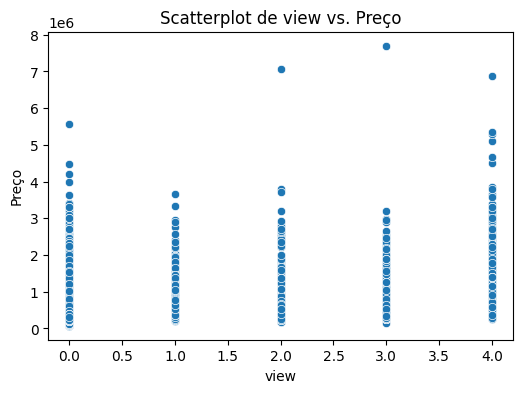

In [16]:
for variable in top_5_correlated:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=variable, y='price', data=df)
    plt.title(f'Scatterplot de {variable} vs. Preço')
    plt.xlabel(variable)
    plt.ylabel('Preço')
    plt.show()



**Questão 2:** Regressão Linear Simples das top 5 variáveis correlacionadas

### Regressão Linear das variáveis target

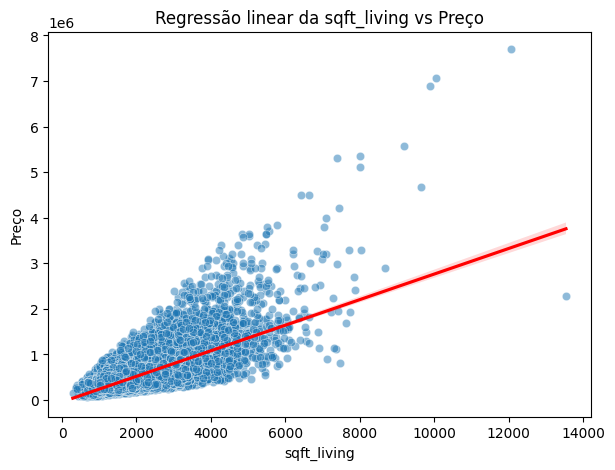

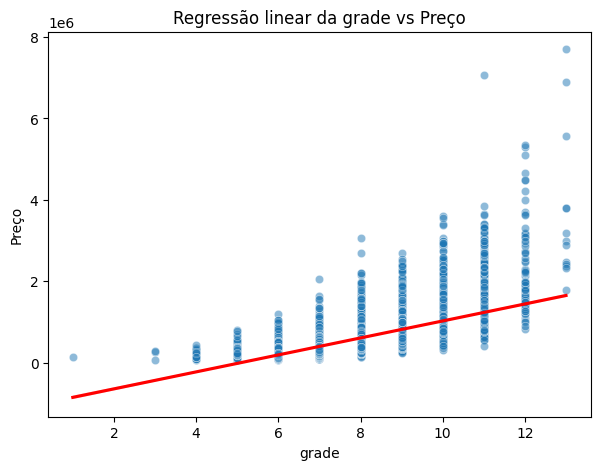

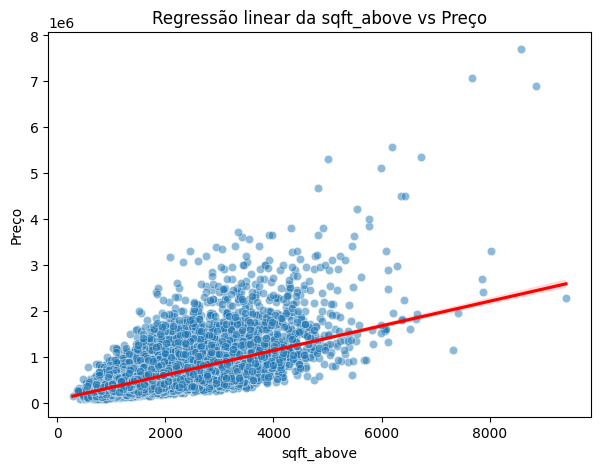

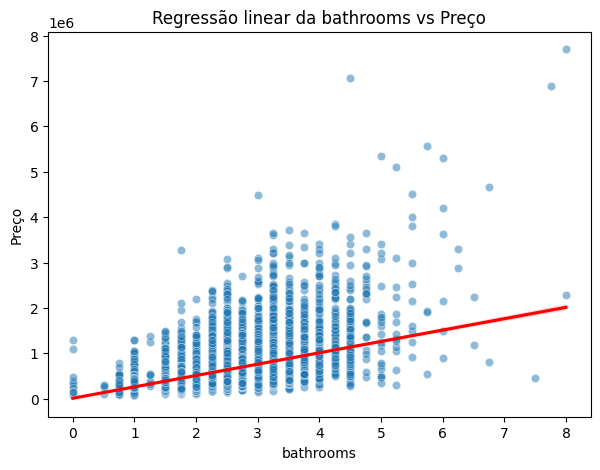

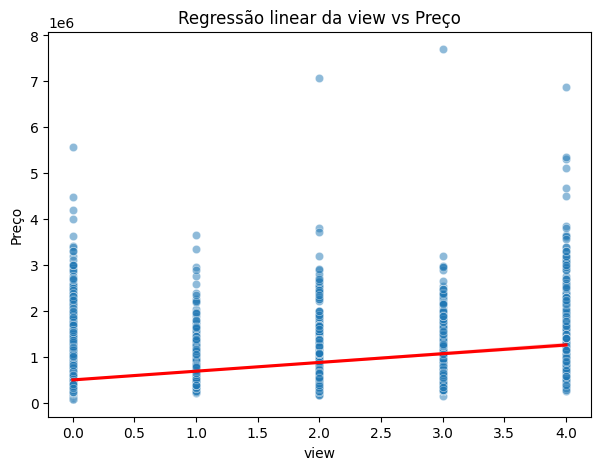

In [35]:
#Plotando a regressão linear simples das variáveis target

for column in top_5_correlated:
  plt.figure(figsize= (7,5))
  sns.scatterplot(data=df_numeric, x=column, y='price', alpha=0.5)

  #função regplot pra regressão e o plot da reta
  sns.regplot(data=df_numeric, x=column, y='price', scatter=False, color='red' )

  plt.title(f'Regressão linear da {column} vs Preço')
  plt.xlabel(column)
  plt.ylabel('Preço')
  plt.show()



Análise dos resíduos


Interpretação para sqft_living :

Coeficiente: 280.62356789744854
P-valor: 0.0
O coeficiente é estatisticamente significativo.



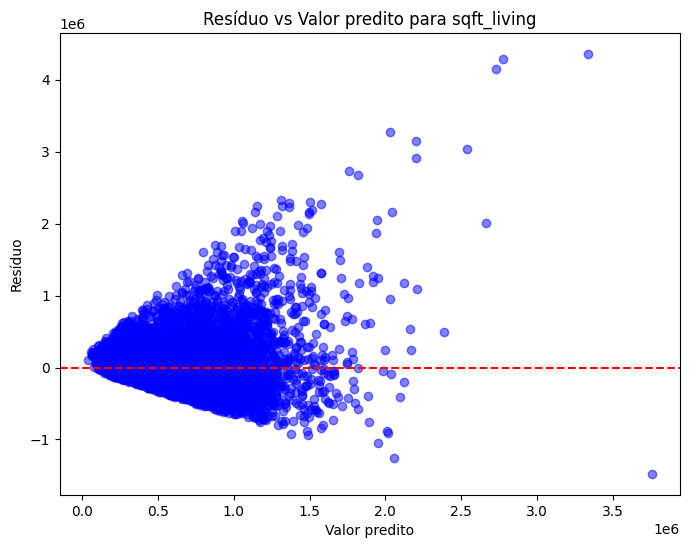


Interpretação para grade :

Coeficiente: 208457.56245837908
P-valor: 0.0
O coeficiente é estatisticamente significativo.



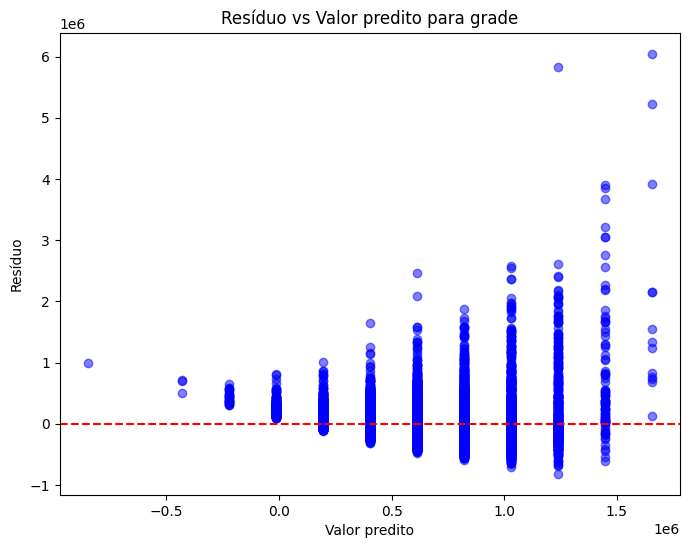


Interpretação para sqft_above :

Coeficiente: 268.4731877618894
P-valor: 0.0
O coeficiente é estatisticamente significativo.



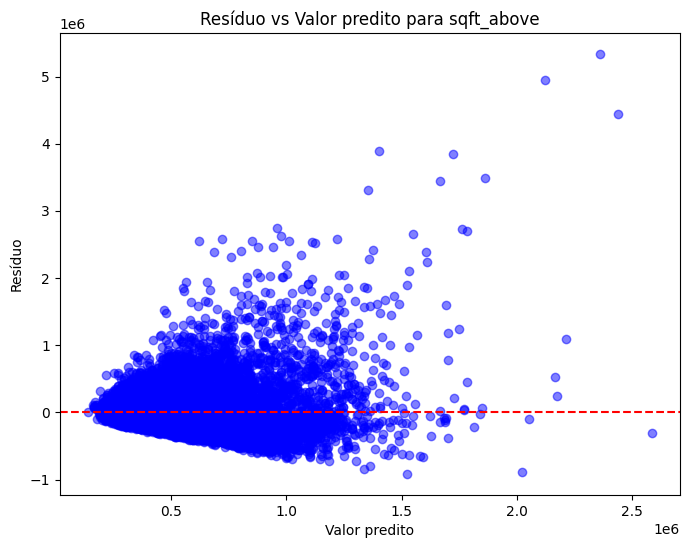


Interpretação para bathrooms :

Coeficiente: 250326.51630210318
P-valor: 0.0
O coeficiente é estatisticamente significativo.



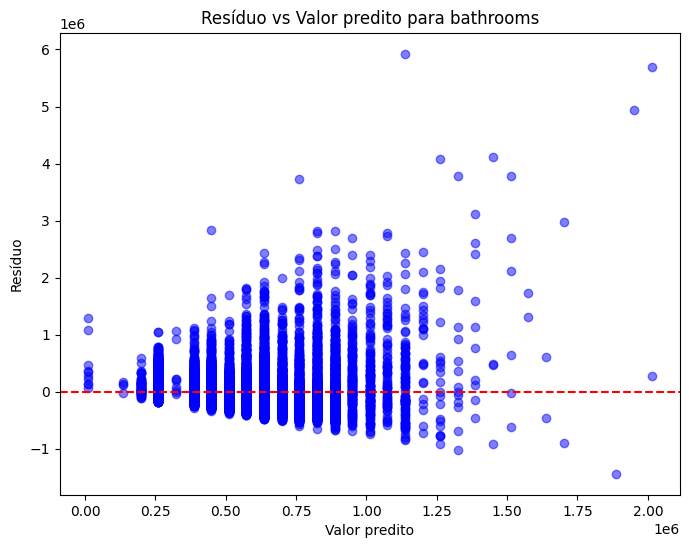


Interpretação para view :

Coeficiente: 190335.2479268495
P-valor: 0.0
O coeficiente é estatisticamente significativo.



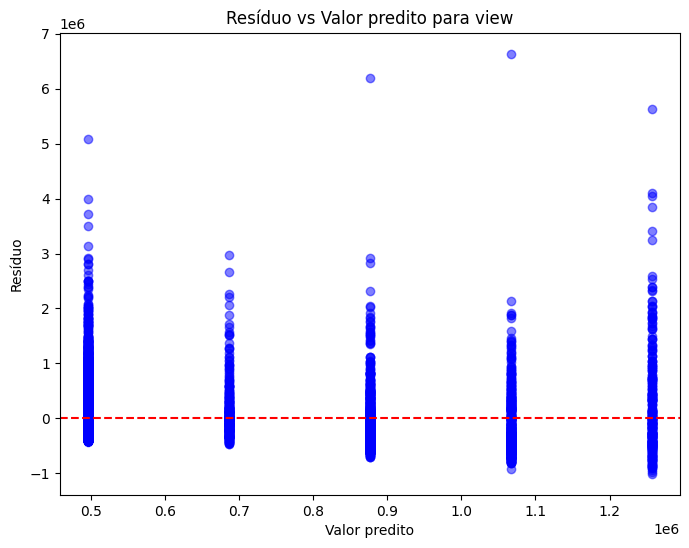

In [36]:
# Gráficos dos resíduos para cada variável e interpretação dos ajustes
for column in top_5_correlated:
    X = sm.add_constant(df[column])
    y = df["price"]
    model = sm.OLS(y, X).fit()

    #print(model.summary())  #imprimindo os resultados da regressão

    print("\nInterpretação para", column, ":\n")
    print("Coeficiente:", model.params[column])
    print("P-valor:", model.pvalues[column])
    if model.pvalues[column] < 0.05:
        print("O coeficiente é estatisticamente significativo.\n")
    else:
        print("O coeficiente não é estatisticamente significativo.\n")

    #salva os dados dos resíduos e calcula valores preditos
    residuals = model.resid
    predicted_values = model.fittedvalues

    #gráficos
    plt.figure(figsize=(8, 6))
    plt.scatter(predicted_values, residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Resíduo vs Valor predito para {column}')
    plt.xlabel('Valor predito')
    plt.ylabel('Resíduo')
    plt.show()

Variável: **sqft_living**

Coeficiente: 280.62
P-valor: 0.0

Interpretação: Cada aumento de 1 unidade na área de estar (sqft_living) está associado a um aumento médio de $280.62 no preço do imóvel. O coeficiente é estatisticamente significativo, indicando uma influência significativa da área de estar no preço.

Variável: **grade**

Coeficiente: 208457.56
P-valor: 0.0

Interpretação: Cada aumento de 1 ponto na classificação (grade) está associado a um aumento médio de $208,457.56 no preço do imóvel. O coeficiente é estatisticamente significativo, sugerindo uma forte influência da classificação no preço.

Variável: **sqft_above**

Coeficiente: 268.47
P-valor: 0.0

Interpretação: Cada aumento de 1 unidade na área acima do solo (sqft_above) está associado a um aumento médio de $268.47 no preço do imóvel. O coeficiente é estatisticamente significativo, indicando uma influência significativa da área acima do solo no preço.

Variável: **bathrooms**

Coeficiente: 250326.52
P-valor: 0.0

Interpretação: Cada banheiro adicional está associado a um aumento médio de $250,326.52 no preço do imóvel. O coeficiente é estatisticamente significativo, indicando uma forte influência do número de banheiros no preço.

Variável: **view**

Coeficiente: 190335.25
P-valor: 0.0

Interpretação: Cada incremento de 1 no número de quartos com vista(view) está associado a um aumento médio de $190,335.25 no preço do imóvel. O coeficiente é estatisticamente significativo, sugerindo uma influência importante da vista no preço